# Model Building

In [79]:
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

# Load train and test dataset

## Load dataset

In [80]:
def load_dataset():
	(trainX, trainY), (testX, testY) = mnist.load_data()
	"""Reshaping dataset"""
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	"""one hot vector form """
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY


# Preparation of dataset


In [81]:
def prep_pixels(train, test):
	train = train.astype('float32')
	test = test.astype('float32')
	return train / 255.0, test / 255.0

# CNN Model

In [82]:
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	"""compile model"""
	opt = SGD(learning_rate=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

# Test Model

In [83]:
def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	"""For cross validation"""
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	for train_ix, test_ix in kfold.split(dataX):
		model = define_model()
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		""" Fit model"""
		history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
		""" Evaluate model"""
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		""" For Plotting stores scores"""
		scores.append(acc)
		histories.append(history)
	return scores, histories, model

# Learning Curve

In [84]:
def show_learning_curve(histories):
	for i in range(len(histories)):
		""" Plot loss"""
		plt.subplot(2, 1, 1)
		plt.title('Cross Entropy Loss')
		plt.plot(histories[i].history['loss'], color='red', label='train')
		plt.plot(histories[i].history['val_loss'], color='blue', label='test')
		""" Plot accuracy"""
		plt.subplot(2, 1, 2)
		plt.title('Classification Accuracy')
		plt.plot(histories[i].history['accuracy'], color='yellow', label='train')
		plt.plot(histories[i].history['val_accuracy'], color='green', label='test')
	plt.show()

# Performance

In [85]:
def performance(scores):
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	plt.boxplot(scores)
	plt.show()

# Base Function to run

In [86]:
def run_and_test():
  trainX, trainY, testX, testY = load_dataset()
  trainX, testX = prep_pixels(trainX, testX)
  scores, histories, model = evaluate_model(trainX, trainY)
  show_learning_curve(histories)
  performance(scores)
  model.save('model.h5')

> 98.483
> 98.733
> 98.442
> 98.842
> 98.692


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


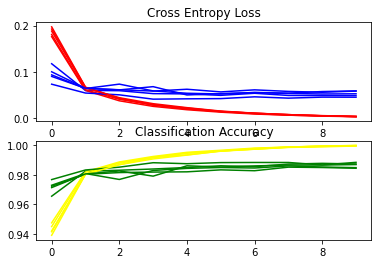

Accuracy: mean=98.638 std=0.152, n=5


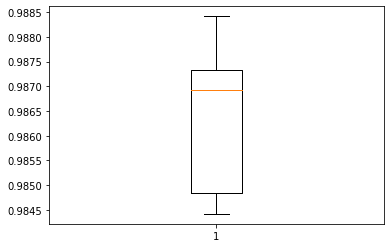

In [87]:
run_and_test()

# Test

In [90]:
from numpy import argmax
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.models import load_model

In [107]:
def load_image(filename):
  test_img = load_img(filename, grayscale=True, target_size=(28, 28))
  img = img_to_array(test_img)
  img = img.reshape(1, 28, 28, 1)
  img = img.astype('float32')
  img = img / 255.0
  return img,test_img

# Predict the class

In [108]:
def predict():
  img,test_img = load_image('sample_image-768x763.png')
  model = load_model('model.h5')

  predict_value = model.predict(img)
  digit = argmax(predict_value)
  print(digit)
  return test_img

# Function to run test

In [109]:
predict()

/usr/local/lib/python3.7/dist-packages/keras/utils/image_utils.py:382: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


1/1 [==============================] - 0s 112ms/step
7
